In [2]:
!pip install --upgrade numpy==1.24.4 scipy==1.10.1 gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but 

In [7]:
import gensim.downloader as api
from gensim.models import KeyedVectors

model = api.load('glove-wiki-gigaword-50')  # 50-dimensional vectors
#model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print("king - man + woman =", model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))

print("Similarity (man, woman):", model.similarity('man', 'woman'))

print("Odd one out:", model.doesnt_match(['king', 'prince', 'general', 'joker']))


king - man + woman = [('queen', 0.8523604273796082)]
Similarity (man, woman): 0.8860338
Odd one out: joker


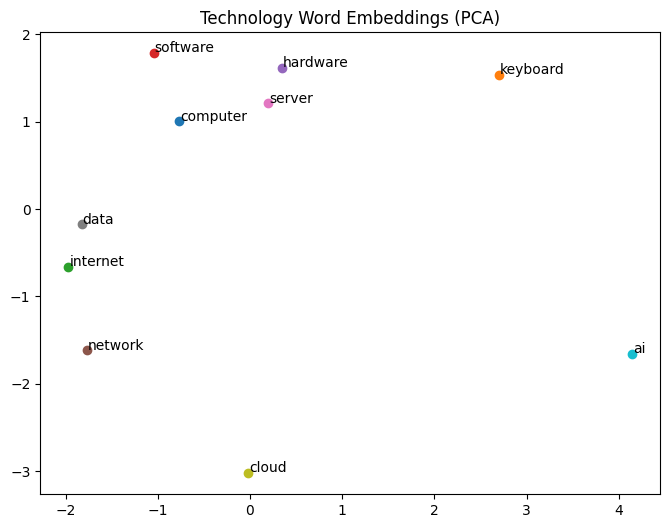

Similar to 'cloud': [('clouds', 0.821401059627533), ('dust', 0.763418972492218), ('horizon', 0.7331849932670593), ('beneath', 0.7208760976791382), ('surface', 0.719190239906311)]


In [9]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = api.load('glove-wiki-gigaword-50')

words = ['computer', 'keyboard', 'internet', 'software', 'hardware',
         'network', 'server', 'data', 'cloud', 'ai']

vectors = [model[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word)
plt.title("Technology Word Embeddings (PCA)")
plt.show()

def get_similar_words(word):
    if word in model:
        return model.most_similar(word, topn=5)
    else:
        return f"'{word}' not in vocabulary."

print("Similar to 'cloud':", get_similar_words('cloud'))


In [10]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

medical_corpus = [
    "The patient was diagnosed with diabetes mellitus type 2.",
    "Insulin therapy is used to manage blood sugar levels.",
    "Hypertension is a chronic condition with elevated blood pressure.",
    "Symptoms include fatigue, blurred vision, and frequent urination.",
    "Metformin is a common medication for diabetes.",
    "Cardiovascular diseases include heart attacks and strokes.",
    "A balanced diet and exercise help prevent obesity.",
    "The physician prescribed antihypertensive drugs.",
    "High cholesterol increases the risk of heart disease.",
    "Regular check-ups are essential for managing chronic illness."
]

tokenized_corpus = [simple_preprocess(doc) for doc in medical_corpus]

model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=2, sg=1)

print("Words similar to 'diabetes':", model.wv.most_similar('diabetes', topn=5))
print("Words similar to 'hypertension':", model.wv.most_similar('hypertension', topn=5))
print("Similarity between 'diabetes' and 'metformin':", model.wv.similarity('diabetes', 'metformin'))


Words similar to 'diabetes': [('obesity', 0.32039573788642883), ('fatigue', 0.30657994747161865), ('condition', 0.27056750655174255), ('chronic', 0.22422748804092407), ('patient', 0.21439410746097565)]
Words similar to 'hypertension': [('mellitus', 0.25771480798721313), ('heart', 0.2375849187374115), ('balanced', 0.19543924927711487), ('for', 0.16947846114635468), ('condition', 0.16570056974887848)]
Similarity between 'diabetes' and 'metformin': -0.2828529


In [11]:
import gensim.downloader as api

model = api.load('glove-wiki-gigaword-50')

original_prompt = "Explain the impact of climate change on agriculture."

def enrich_prompt(prompt, topn=3):
    words = prompt.lower().split()
    similar_words = []
    for word in words:
        if word in model:
            sims = model.most_similar(word, topn=topn)
            similar_words.extend([w for w, _ in sims])
    unique_similar = list(dict.fromkeys(similar_words))
    enriched_prompt = prompt + " Consider these related terms: " + ", ".join(unique_similar)
    return enriched_prompt

enriched_prompt = enrich_prompt(original_prompt)

print("=== Original Prompt ===")
print(original_prompt)

print("\n=== Enriched Prompt ===")
print(enriched_prompt)


=== Original Prompt ===
Explain the impact of climate change on agriculture.

=== Enriched Prompt ===
Explain the impact of climate change on agriculture. Consider these related terms: understand, reason, how, which, part, in, significant, affect, result, the, warming, environment, economic, changes, this, future, before, .


In [12]:
import gensim.downloader as api
import random

model = api.load('glove-wiki-gigaword-50')

def creative_paragraph(seed_word, topn=5):
    if seed_word not in model:
        return f"'{seed_word}' not found in vocabulary."

    similar_words = [w for w, _ in model.most_similar(seed_word, topn=topn)]

    paragraph = (
        f"Once upon a time, the word '{seed_word}' sparked inspiration. "
        f"It brought to mind ideas like {', '.join(similar_words[:-1])}, "
        f"and finally {similar_words[-1]}. Together, these concepts painted a vivid picture, "
        f"inviting creativity and storytelling to flow freely."
    )
    return paragraph

seed = "dream"
print(creative_paragraph(seed))

Once upon a time, the word 'dream' sparked inspiration. It brought to mind ideas like dreams, love, wonder, imagine, and finally glory. Together, these concepts painted a vivid picture, inviting creativity and storytelling to flow freely.


In [1]:
!pip install transformers
!pip install numpy scipy
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")

sentences = [
    "I love this product! It works perfectly.",
    "The movie was boring and too long.",
    "Customer service was helpful and prompt.",
    "I'm disappointed with the quality.",
    "This is the best experience I've ever had!"
]

results = sentiment_analyzer(sentences)

for sentence, result in zip(sentences, results):
    print(f"Sentence: {sentence}\nSentiment: {result['label']}, Confidence: {result['score']:.2f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Sentence: I love this product! It works perfectly.
Sentiment: POSITIVE, Confidence: 1.00

Sentence: The movie was boring and too long.
Sentiment: NEGATIVE, Confidence: 1.00

Sentence: Customer service was helpful and prompt.
Sentiment: POSITIVE, Confidence: 1.00

Sentence: I'm disappointed with the quality.
Sentiment: NEGATIVE, Confidence: 1.00

Sentence: This is the best experience I've ever had!
Sentiment: POSITIVE, Confidence: 1.00



In [2]:
from transformers import pipeline

summarizer = pipeline("summarization", model="t5-small")

text = """
The Industrial Revolution, which took place from the 18th to the 19th centuries, was a period during which predominantly agrarian, rural societies in Europe and America became industrial and urban. Prior to the Industrial Revolution, manufacturing was often done in people’s homes, using hand tools or basic machines. Industrialization marked a shift to powered, special-purpose machinery, factories and mass production. The iron and textile industries, along with the development of the steam engine, played central roles in the Industrial Revolution, which also saw improved systems of transportation, communication and banking. While industrialization brought about an increased volume and variety of manufactured goods and an improved standard of living for some, it also resulted in often grim employment and living conditions for the poor and working classes.
"""

summary = summarizer(text, max_length=60, min_length=30, do_sample=False)

print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


the Industrial Revolution took place from the 18th to the 19th centuries . the industrial revolution marked a shift to powered, special-purpose machinery, factories and mass production . iron and textile industries, along with the development of the steam engine, played central roles .


In [7]:
from langchain import PromptTemplate
from langchain.llms import Cohere
from google.colab import drive

drive.mount('/content/drive')

with open("/content/drive/MyDrive/Colab Notebooks/content.txt", "r", encoding="ISO-8859-1") as file:
    text_content = file.read()

COHERE_API_KEY = "4jZ1rr4LalaGrfHm3TIvImQpc4sD1JUnDF1cl26b"

cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

template = """
You are an AI assistant helping to summarize and analyze a text document. Here is the document content:

{text}

🔹 Summary:
-   Provide a concise summary of the document.

🔹 Key Takeaways:
-   List 3 important points from the text.

🔹 Sentiment Analysis:
-   Determine if the sentiment of the document is Positive, Negative, or Neutral.
"""
prompt_template = PromptTemplate(input_variables=["text"], template=template)

formatted_prompt = prompt_template.format(text=text_content)

response = cohere_llm.predict(formatted_prompt)

print(response)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-b65afa08c3a8>:32: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = cohere_llm.predict(formatted_prompt)


 

Summary: This essay examines the evolution and impact of First-Person Shooter (FPS) games, a genre that has thrived remarkably within the gaming industry. Beginning with groundbreaking titles like 'Wolfenstein 3D' and 'Doom,' FPS games have continually evolved, benefitting from technological advancements and innovative game design. Today, FPS games remain titans within the gaming sphere, with blockbuster franchises like 'Call of Duty' and 'Battlefield' captivating vast audiences year after year. FPS games have influenced the rise of esports and left a lasting mark on mainstream culture, proving their Staying power and impact. 

Key Takeaways: 

1. FPS games have thrived thanks to technological advances, innovative gameplay mechanics, and annual releases that keep them at the forefront of popular culture. 

2. The immersive experience offered by FPS games has revolutionized gaming, allowing players to get literal inside the action. 

3. The rise of esports and the popularity of compe

In [11]:
!pip install langchain cohere wikipedia pydantic -q

import os
from langchain.llms import Cohere
from langchain.chains import LLMChain
from langchain.utilities import WikipediaAPIWrapper
from langchain.output_parsers import PydanticOutputParser
from langchain import PromptTemplate
from pydantic import BaseModel

os.environ["COHERE_API_KEY"] = "4jZ1rr4LalaGrfHm3TIvImQpc4sD1JUnDF1cl26b"

class Institution(BaseModel):
    founder: str
    founded_year: str
    branches: str
    employees: str
    summary: str

output_parser = PydanticOutputParser(pydantic_object=Institution)

prompt = PromptTemplate(
    input_variables=["institution", "format_instructions"],
    template="""
Extract the following details from Wikipedia about {institution}:
- Founder
- Year founded
- Current branches
- Number of employees
- A brief 4-line summary

Output JSON strictly following these instructions:
{format_instructions}
"""
)

llm = Cohere(cohere_api_key=os.environ["COHERE_API_KEY"], model="command")

wiki = WikipediaAPIWrapper()

def get_institution_info(name: str):
    wiki_summary = wiki.run(name)
    chain = LLMChain(llm=llm, prompt=prompt, output_parser=output_parser)
    return chain.run(institution=name, format_instructions=output_parser.get_format_instructions())

institution_name = input("Institution name: ").strip()
print(get_institution_info(institution_name))


Institution name: google
founder='Larry Page and Sergey Brin' founded_year='1998' branches='Canada, United Kingdom, Singapore, Australia, France, Germany, Hungary, India, Ireland, Italy, Japan, Netherlands, Norwey, Poland, Portugal, Spain, Sweden, Switzerland, United States,Taiwan' employees='150,000' summary='Google is an American multinational technology company focusing on search engineering technology, online advertising, cloud computing, computer software, quantum computing, e-commerce, artificial intelligence, and consumer electronics.'


In [14]:
!pip install langchain cohere wikipedia-api -q

from langchain import PromptTemplate
from langchain.llms import Cohere
import wikipediaapi

COHERE_API_KEY = "4jZ1rr4LalaGrfHm3TIvImQpc4sD1JUnDF1cl26b"
llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

wiki = wikipediaapi.Wikipedia(user_agent="ipc-chatbot/1.0", language='en')
ipc_text = wiki.page("Indian Penal Code").text[:3000]

prompt = PromptTemplate(
    input_variables=["text", "q"],
    template="Use this IPC text:\n\n{text}\n\nAnswer this question:\n{q}"
)

def ask_ipc(question):
    p = prompt.format(text=ipc_text, q=question)
    return llm.predict(p)

print(ask_ipc("explain ipc 302"))


SECTION 302 of the IPC denotes the penalty for murder. Murder is defined as the unlawful termination of another person's life with malice aforethought. 

Malice aforethought can be defined as the perpetrator consciously committing act that intimidated his awareness of the risk of death that the actions involved may probably cause to somebody. It is regarded as a horrific crime, hence listed under the IPC.

The penalties for murder are rigorous and non-bailable, It mandates a minimum sentence of imprisonment for life, whereas, the maximum sentence could be death for the murderer. 
